**Classification of birds to species with Convolutional Neural Network**

Learning paradigm: (strong) supervised learning

<u>This notebook documents 1. experiment conducted in 10th of April 2022</u>.

Dataset I work with is: https://www.kaggle.com/datasets/gpiosenka/100-bird-species/. Check what Convolutional neural networks are all about at https://d2l.ai/chapter_convolutional-neural-networks/index.html before making changes to this notebook.

Dataset was extracted to the same folder as this notebook was placed in.

**What was our task here**

Task here was to start with a sample implementation based on best practices.

In [4]:
# import utilities
import os # to get relative path to project directory and therefore dataset
import matplotlib.pyplot as plt # to evaluate model performance

import tensorflow as tf # import tensorflow
from keras.callbacks import EarlyStopping # stop training when you have no progress
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator # work with data through the facade
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Dropout # input, output, hidden layers, activation...
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolutional layer and max pooling
from tensorflow.keras.layers import BatchNormalization # optimization, regularization technique

Training set consists of 58 388 RGB images (that means 3 channels), 224px x 224px. Validation set consists of 2000 images and test set consists of 2000 images. There are 356 unique bird species in a training dataset. There are 400 unique bird species in validation dataset and 400 bird species in test dataset too. Further statistics can be found in attached document.

Attribute "shuffle" set to True and passed to ImageDataGenerator means application of mini-batch optimization technique.

In [5]:
BASE_DIR = os.getcwd() # extract dataset from Kaggle to same folder as you have in this notebook

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'testing')

In [6]:
TRAIN_CATEGORIES = os.listdir(TRAIN_DIR)
Train_Category_count = len(TRAIN_CATEGORIES) # 85 % of males, training set is 97 % of the whole dataset

VAL_CATEGORIES = os.listdir(VALIDATION_DIR)
Val_Category_count = len(VAL_CATEGORIES)

TEST_CATEGORIES = os.listdir(TEST_DIR)
Test_Category_count = len(TEST_CATEGORIES)

Applying standard rescale factor by which all data values would be multiplied. We're doing this because we deal with images in RGB, where pixel values vary between 0 and 255. Such values would be too high for our model to process. This is why I rescale them to interval 0-1.

In [7]:
data_iterator = ImageDataGenerator(rescale=1./255,)

In [8]:
train_data = data_iterator.flow_from_directory(
    directory = TRAIN_DIR, 
    batch_size = 64, 
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

validation_data = data_iterator.flow_from_directory(
    directory = VALIDATION_DIR, 
    batch_size = 64,
    shuffle = True,
    class_mode="categorical",
    target_size=(224, 224))

test_data = data_iterator.flow_from_directory(
    directory = TEST_DIR,
    batch_size=64,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


**Architecture of this Convolutional Neural Network**

1. Convolutional layer - to extract patterns and abstract from low-level features of the images
2. Activation layer - activation functions with a same purpose as they have in Multilayer perceptrons. 
3. Pooling layer - optimization with Max pooling.
4. Normalization layer - batch normalization as optimization technique. Conducted after activation, before another convolution
5. Dense layer - fully connected layer of the MLP.

Input to this convolutional network are RGB images 224 x 224 px with 3 channels. First convolutional layer works with 3 channels, but this does not mean all convolutional layers have to work with these same 3 channels (they usually create activation maps with more channels).

Best practice is to use same activation function across all layers. 

**Strategy of the Learning Process**

1. Setup, build and run this Convolutional Neural Network.
2. Check this model performance.
3. Conduct more experiments with probably different set of the hyper-parameters.

In [9]:
tf.keras.backend.clear_session()

IMAGE = load_img(os.getcwd() + "\\testing\\ABBOTTS BABBLER\\1.jpg")
IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape

model = tf.keras.models.Sequential()

# lowest convolutional layer for identification of the edges of birds
model.add(Conv2D(32, (3, 3), padding='same', input_shape=SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# convolutional layer to learn and store mid-level features of the bird species
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# highest convolutional layer to store complex information about the look of birds
model.add(Conv2D(32, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# and finally mlp
model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Activation('relu'))
model.add(Dense(Train_Category_count)) 
model.add(Activation('softmax'))

model.compile(optimizer = "adam",
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

EPOCHS = 4

# do not specify batch sizes here, because generators declared above generate batches
history = model.fit(train_data, epochs=EPOCHS, validation_data = validation_data, 
                    steps_per_epoch=len(train_data), validation_steps = len(validation_data))

Epoch 1/4
913/913 [==============================] - 1083s 1s/step - loss: 5.3023 - accuracy: 0.0397 - val_loss: 4.2912 - val_accuracy: 0.1135
Epoch 2/4
913/913 [==============================] - 1084s 1s/step - loss: 3.9250 - accuracy: 0.1808 - val_loss: 3.3192 - val_accuracy: 0.2775
Epoch 3/4
913/913 [==============================] - 906s 993ms/step - loss: 3.2048 - accuracy: 0.2986 - val_loss: 2.8310 - val_accuracy: 0.3585
Epoch 4/4
913/913 [==============================] - 946s 1s/step - loss: 2.7614 - accuracy: 0.3744 - val_loss: 2.5789 - val_accuracy: 0.4090


**Model Evaluation**

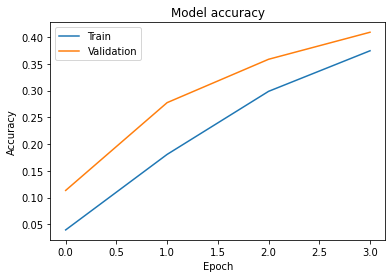

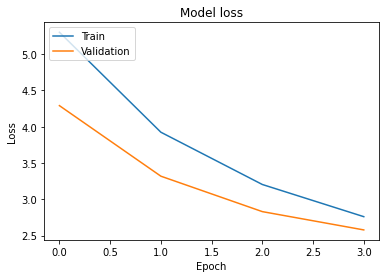

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# save model for later use

model.save(os.getcwd() + '/model-from-3-experiment.h5')